In [12]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline
#%tensorflow_version 2.2

import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


In [13]:
!ls
scaler = StandardScaler()


def get_x_y_sets(csv_path_list):
  csv_content = pd.concat([pd.read_csv(c) for c in csv_path_list], ignore_index=True)
  x_csv_content = csv_content[['AVG_METHOD_LENGTH',
       'PERCENTAGE_VOLUME_METHODS_WITH_LENGTH_LESS_THAN_15',
       'PERCENTAGE_VOLUME_METHODS_WITH_LENGTH_MORE_THAN_15',
       'PERCENTAGE_VOLUME_METHODS_WITH_LENGTH_MORE_THAN_30',
       'PERCENTAGE_METHODS_WITH_ABC_IN_RANGE_0_10',
       'PERCENTAGE_METHODS_WITH_ABC_IN_RANGE_11_999']]
  y_csv_content = csv_content['IS_PASSED']
  x_set = x_csv_content
  x_set['AVG_METHOD_LENGTH'] = x_set['AVG_METHOD_LENGTH'] / 50
  # y_set = tf.one_hot(y_csv_content, depth=2)
  y_set = y_csv_content
  return x_set, y_set

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [14]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция,
#которая делает сумму всех значений нейронов слоя, равной 1
#Подробнее https://keras.io/activations/
from keras.layers import LeakyReLU

model = Sequential()
# model.add(Dense(30, input_dim=6, activation="relu"))
model.add(Dense(units=300, input_dim=6, activation=LeakyReLU(alpha=0.05)))
model.add(Dense(600, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# now add a ReLU layer explicitly:

In [15]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               2100      
                                                                 
 dense_4 (Dense)             (None, 600)               180600    
                                                                 
 dense_5 (Dense)             (None, 1)                 601       
                                                                 
Total params: 183,301
Trainable params: 183,301
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
best_model_save_path ='_best_model.h5'
print(best_model_save_path)
checkpoint_callback = ModelCheckpoint(best_model_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

_best_model.h5


In [17]:
tf.config.run_functions_eagerly(True)

x_train, y_train = get_x_y_sets(['2lab.csv'])

print('Размер обучающей выборки наборов метрик проектов -', x_train.shape)
print('Размер обучающей выборки - верных ответов -', y_train.shape)

# print(x_train)
print(y_train)



history = model.fit(x_train, y_train, batch_size=20, epochs=15, verbose=1, validation_split=0.35, callbacks=[checkpoint_callback])

Размер обучающей выборки наборов метрик проектов - (28, 6)
Размер обучающей выборки - верных ответов - (28,)
0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    0
25    1
26    0
27    1
Name: IS_PASSED, dtype: int64
Epoch 1/15
1/1 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.3889

C:\Users\avgor\AppData\Local\Temp\ipykernel_17860\3318382617.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_set['AVG_METHOD_LENGTH'] = x_set['AVG_METHOD_LENGTH'] / 50
C:\Users\avgor\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
C:\Users\avgor\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions


Epoch 1: val_accuracy improved from -inf to 0.70000, saving model to _best_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.6917 - accuracy: 0.3889 - val_loss: 0.6640 - val_accuracy: 0.7000
Epoch 2/15
1/1 [==============================] - ETA: 0s - loss: 0.6628 - accuracy: 0.7778
Epoch 2: val_accuracy did not improve from 0.70000
1/1 [==============================] - 0s 30ms/step - loss: 0.6628 - accuracy: 0.7778 - val_loss: 0.6405 - val_accuracy: 0.7000
Epoch 3/15
1/1 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.7778
Epoch 3: val_accuracy improved from 0.70000 to 0.80000, saving model to _best_model.h5
1/1 [==============================] - 0s 42ms/step - loss: 0.6372 - accuracy: 0.7778 - val_loss: 0.6199 - val_accuracy: 0.8000
Epoch 4/15
1/1 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.7778
Epoch 4: val_accuracy did not improve from 0.80000
1/1 [==============================] - 0s 29ms/step - loss: 0.613

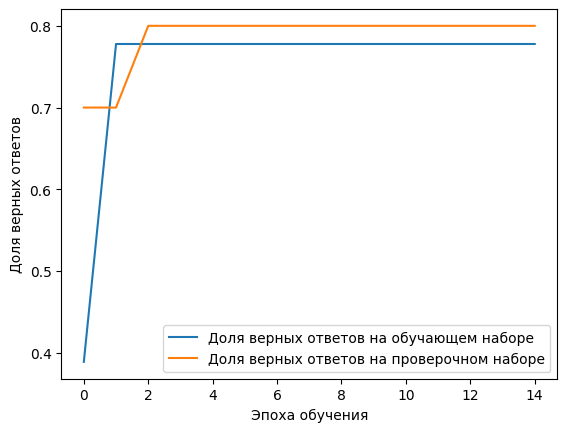

In [18]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test, y_test, verbose=1)

NameError: name 'x_test' is not defined

In [21]:
model.load_weights(best_model_save_path)


In [ ]:
model.evaluate(x_test, y_test, verbose=1)

In [22]:
model.save("model_code_metrics.h5")